In [1]:
from bs4 import BeautifulSoup
import requests

# List of article URLs
urls = [
    'https://www.aljazeera.net/news/2024/4/6/%D8%A7%D9%84%D9%82%D9%88%D8%A7%D8%AA-%D8%A7%D9%84%D8%B1%D9%88%D8%B3%D9%8A%D8%A9-%D8%B9%D9%84%D9%89-%D9%85%D8%B4%D8%A7%D8%B1%D9%81-%D8%A8%D9%84%D8%AF%D8%A9',
    'https://www.aljazeera.net/ebusiness/2024/4/7/%D8%A8%D9%84%D9%88%D9%85%D8%A8%D9%8A%D8%B1%D8%BA-%D8%A7%D9%84%D8%B3%D8%B9%D9%88%D8%AF%D9%8A%D8%A9-%D8%AA%D8%B9%D9%8A%D8%AF-%D8%AA%D9%82%D9%8A%D9%8A%D9%85-%D9%85%D8%B4%D8%B1%D9%88%D8%B9',
    'https://www.aljazeera.net/tech/2024/4/6/%D9%83%D8%AA%D8%A7%D8%A8-%D9%81%D8%B1%D9%8A%D9%82-%D8%A7%D9%84%D8%A2%D9%84%D8%A9-%D8%A7%D9%84%D8%A8%D8%B4%D8%B1%D9%8A%D8%A9-%D9%8A%D9%83%D8%B4%D9%81-%D9%87%D9%88%D9%8A%D8%A9'
]

arabic_article_text = ''

for url in urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract the text of each article
    for paragraph in soup.find_all('p'):
        arabic_article_text += paragraph.text + "\n"  # Added newline for better readability between articles

print(arabic_article_text)

كثفت القوات الروسية الضغط على بلدة شاسيف يار الإستراتيجية في دونيتسك شرق أوكرانيا، بينما قال الرئيس الأوكراني فولوديمير زيلينسكي إن قواته عاجزة عن شن هجوم مضاد بسبب نقص الذخيرة مع تأخر وصول الدعم الغربي.
وقال مدونون عسكريون أوكرانيون وروس إن القوات الروسية وصلت إلى ضواحي البلدة التي تقع على مسافة 20 كيلومترا غرب مدينة باخموت التي سيطر عليها الجيش الروسي وقوات مجموعة فاغنر في مايو/أيار من العام الماضي بعد معارك طاحنة استمرت أشهرا.
بيد أن قائد الجيش الأوكراني أولكسندر سيرسكي قال السبت إن تشاسيف يار ما زالت تحت سيطرة القوات الأوكرانية، مضيفا أن كل محاولات الروس لاقتحامها باءت بالفشل.
وتابع سيرسكي أن البلدة تشهد واحدة من أعنف المعارك، حيث تحاول القوات الروسية كسر الدفاعات الأوكرانية.
من جهته، قال رئيس الإدارة المحلية في تشاسيف يار سيرغي تشاوس إن الأوضاع في البلدة باتت أكثر خطورة في الأسبوعين الأخيرين.
وفي حال سيطر الروس على مرتفعات تشاسيف يار، فسيتيح لهم ذلك استهداف مدينتي كراماتورسك وسلوفيانسك.
وأقامت القوات الأوكرانية تحصينات قوية في البلدة التي كان عدد سكانها قبل الحرب 13 ألفا ولم يبق ف

In [2]:
# Fetching Data from MongoDB
from pymongo import MongoClient

# Connection URI
uri = "mongodb://localhost:27017/"
# Connect to MongoDB
client = MongoClient(uri)

# Create or switch to the Arabic_NLP database
db = client["Arabic_NLP"]

# Define the collection. If it doesn't exist, it will be created as soon as a document is inserted.
collection = db.articles
documents = collection.find()

In [3]:
import nltk
nltk.download('punkt')  # Tokenizers
nltk.download('stopwords')  # Stopwords list
nltk.download('wordnet')  # For lemmatization

[nltk_data] Downloading package punkt to
[nltk_data]     /home/administrator/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/administrator/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/administrator/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

# Text Cleaning
def clean_text(text):
    # Removing HTML tags, if any
    text = re.sub(r'<.*?>', '', text)
    # Removing punctuation and numbers, if desired
    text = re.sub(r'[^\w\s]', '', text)
    # Removing English letters and numbers
    text = re.sub(r'[a-zA-Z0-9]', '', text)
     # Removing new lines and carriage returns, replace them with a space
    text = re.sub(r'[\n\r]+', ' ', text)
    # Collapsing multiple spaces into a single space
    text = re.sub(r'\s+', ' ', text)
    return text.lower()

# Tokenization
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Removing Stop Words
# NLTK doesn't include Arabic stop words by default, so you might need to define your own list or find a resource online
arabic_stop_words = set(stopwords.words('arabic'))  # Assuming 'arabic' stop words list is available or manually defined

def remove_stop_words(tokens):
    filtered_tokens = [word for word in tokens if word not in arabic_stop_words]
    return filtered_tokens

# Example of a Normalization step (simple case folding for Arabic might not be applicable, but as an example)
def normalize_text(tokens):
    normalized_tokens = [word.lower() for word in tokens]  # Lowercasing might not be applicable for Arabic
    return normalized_tokens

In [5]:
# Applying the Pipeline
cleaned_text = clean_text(arabic_article_text)
print(cleaned_text)

كثفت القوات الروسية الضغط على بلدة شاسيف يار الإستراتيجية في دونيتسك شرق أوكرانيا بينما قال الرئيس الأوكراني فولوديمير زيلينسكي إن قواته عاجزة عن شن هجوم مضاد بسبب نقص الذخيرة مع تأخر وصول الدعم الغربي وقال مدونون عسكريون أوكرانيون وروس إن القوات الروسية وصلت إلى ضواحي البلدة التي تقع على مسافة كيلومترا غرب مدينة باخموت التي سيطر عليها الجيش الروسي وقوات مجموعة فاغنر في مايوأيار من العام الماضي بعد معارك طاحنة استمرت أشهرا بيد أن قائد الجيش الأوكراني أولكسندر سيرسكي قال السبت إن تشاسيف يار ما زالت تحت سيطرة القوات الأوكرانية مضيفا أن كل محاولات الروس لاقتحامها باءت بالفشل وتابع سيرسكي أن البلدة تشهد واحدة من أعنف المعارك حيث تحاول القوات الروسية كسر الدفاعات الأوكرانية من جهته قال رئيس الإدارة المحلية في تشاسيف يار سيرغي تشاوس إن الأوضاع في البلدة باتت أكثر خطورة في الأسبوعين الأخيرين وفي حال سيطر الروس على مرتفعات تشاسيف يار فسيتيح لهم ذلك استهداف مدينتي كراماتورسك وسلوفيانسك وأقامت القوات الأوكرانية تحصينات قوية في البلدة التي كان عدد سكانها قبل الحرب ألفا ولم يبق فيها سوى شخصا وفي ف

In [6]:
# Chemin vers le fichier sur votre bureau
file_path = "/home/administrator/Bureau/my_arabic_corpus.txt"

# Appliquer le nettoyage et stocker le texte dans le fichier
cleaned_text = clean_text(arabic_article_text)

# Écrire le texte nettoyé dans le fichier
with open(file_path, "w", encoding="utf-8") as file:
    file.write(cleaned_text)

print("Texte nettoyé stocké dans le fichier arabic_corpus.txt sur votre bureau.")


Texte nettoyé stocké dans le fichier arabic_corpus.txt sur votre bureau.


In [7]:
# Chemin vers le fichier sur votre bureau
file_path = "/home/administrator/Bureau/my_arabic_corpus.txt"

In [8]:
file_path = "/home/administrator/Bureau/my_arabic_corpus.txt"

# Ouvrir le fichier en mode lecture
with open(file_path, 'r', encoding='utf-8') as file:
    # Lire tout le contenu du fichier
    file_content = file.read()

# Afficher le contenu du fichier
print(file_content)


كثفت القوات الروسية الضغط على بلدة شاسيف يار الإستراتيجية في دونيتسك شرق أوكرانيا بينما قال الرئيس الأوكراني فولوديمير زيلينسكي إن قواته عاجزة عن شن هجوم مضاد بسبب نقص الذخيرة مع تأخر وصول الدعم الغربي وقال مدونون عسكريون أوكرانيون وروس إن القوات الروسية وصلت إلى ضواحي البلدة التي تقع على مسافة كيلومترا غرب مدينة باخموت التي سيطر عليها الجيش الروسي وقوات مجموعة فاغنر في مايوأيار من العام الماضي بعد معارك طاحنة استمرت أشهرا بيد أن قائد الجيش الأوكراني أولكسندر سيرسكي قال السبت إن تشاسيف يار ما زالت تحت سيطرة القوات الأوكرانية مضيفا أن كل محاولات الروس لاقتحامها باءت بالفشل وتابع سيرسكي أن البلدة تشهد واحدة من أعنف المعارك حيث تحاول القوات الروسية كسر الدفاعات الأوكرانية من جهته قال رئيس الإدارة المحلية في تشاسيف يار سيرغي تشاوس إن الأوضاع في البلدة باتت أكثر خطورة في الأسبوعين الأخيرين وفي حال سيطر الروس على مرتفعات تشاسيف يار فسيتيح لهم ذلك استهداف مدينتي كراماتورسك وسلوفيانسك وأقامت القوات الأوكرانية تحصينات قوية في البلدة التي كان عدد سكانها قبل الحرب ألفا ولم يبق فيها سوى شخصا وفي ف

In [9]:
# Initialiser une liste pour stocker les documents
documents = []

# Ouvrir le fichier en mode lecture
with open(file_path, 'r', encoding='utf-8') as file:
    # Lire chaque ligne du fichier
    for line in file:
        # Ajouter la ligne (document) à la liste des documents
        documents.append(line.strip())  # strip() pour enlever les espaces blancs autour de la ligne

# Afficher les documents
print(documents)

['كثفت القوات الروسية الضغط على بلدة شاسيف يار الإستراتيجية في دونيتسك شرق أوكرانيا بينما قال الرئيس الأوكراني فولوديمير زيلينسكي إن قواته عاجزة عن شن هجوم مضاد بسبب نقص الذخيرة مع تأخر وصول الدعم الغربي وقال مدونون عسكريون أوكرانيون وروس إن القوات الروسية وصلت إلى ضواحي البلدة التي تقع على مسافة كيلومترا غرب مدينة باخموت التي سيطر عليها الجيش الروسي وقوات مجموعة فاغنر في مايوأيار من العام الماضي بعد معارك طاحنة استمرت أشهرا بيد أن قائد الجيش الأوكراني أولكسندر سيرسكي قال السبت إن تشاسيف يار ما زالت تحت سيطرة القوات الأوكرانية مضيفا أن كل محاولات الروس لاقتحامها باءت بالفشل وتابع سيرسكي أن البلدة تشهد واحدة من أعنف المعارك حيث تحاول القوات الروسية كسر الدفاعات الأوكرانية من جهته قال رئيس الإدارة المحلية في تشاسيف يار سيرغي تشاوس إن الأوضاع في البلدة باتت أكثر خطورة في الأسبوعين الأخيرين وفي حال سيطر الروس على مرتفعات تشاسيف يار فسيتيح لهم ذلك استهداف مدينتي كراماتورسك وسلوفيانسك وأقامت القوات الأوكرانية تحصينات قوية في البلدة التي كان عدد سكانها قبل الحرب ألفا ولم يبق فيها سوى شخصا وفي

In [10]:
# Importer le tokenizer approprié
from nltk.tokenize import word_tokenize

# Initialiser une liste pour stocker les documents tokenisés
tokenized_documents = []

# Tokeniser chaque document dans la liste de documents
for document in documents:
    # Tokeniser le document en mots
    tokens = word_tokenize(document)
    # Ajouter les mots tokenisés à la liste de documents tokenisés
    tokenized_documents.append(tokens)

# Afficher les documents tokenisés
print(tokenized_documents)


[['كثفت', 'القوات', 'الروسية', 'الضغط', 'على', 'بلدة', 'شاسيف', 'يار', 'الإستراتيجية', 'في', 'دونيتسك', 'شرق', 'أوكرانيا', 'بينما', 'قال', 'الرئيس', 'الأوكراني', 'فولوديمير', 'زيلينسكي', 'إن', 'قواته', 'عاجزة', 'عن', 'شن', 'هجوم', 'مضاد', 'بسبب', 'نقص', 'الذخيرة', 'مع', 'تأخر', 'وصول', 'الدعم', 'الغربي', 'وقال', 'مدونون', 'عسكريون', 'أوكرانيون', 'وروس', 'إن', 'القوات', 'الروسية', 'وصلت', 'إلى', 'ضواحي', 'البلدة', 'التي', 'تقع', 'على', 'مسافة', 'كيلومترا', 'غرب', 'مدينة', 'باخموت', 'التي', 'سيطر', 'عليها', 'الجيش', 'الروسي', 'وقوات', 'مجموعة', 'فاغنر', 'في', 'مايوأيار', 'من', 'العام', 'الماضي', 'بعد', 'معارك', 'طاحنة', 'استمرت', 'أشهرا', 'بيد', 'أن', 'قائد', 'الجيش', 'الأوكراني', 'أولكسندر', 'سيرسكي', 'قال', 'السبت', 'إن', 'تشاسيف', 'يار', 'ما', 'زالت', 'تحت', 'سيطرة', 'القوات', 'الأوكرانية', 'مضيفا', 'أن', 'كل', 'محاولات', 'الروس', 'لاقتحامها', 'باءت', 'بالفشل', 'وتابع', 'سيرسكي', 'أن', 'البلدة', 'تشهد', 'واحدة', 'من', 'أعنف', 'المعارك', 'حيث', 'تحاول', 'القوات', 'الروسية', 'كسر', 'الد

# Apply one hot encoding, bag of words, and TF-IDF techniques:


In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Apply one hot encoding
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot_encoded = one_hot_vectorizer.fit_transform(documents)

# Apply bag of words
bag_of_words_vectorizer = CountVectorizer()
bag_of_words = bag_of_words_vectorizer.fit_transform(documents)

# Apply TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(documents)


In [12]:
# Display shapes
print("One-Hot Encoded matrix shape:", one_hot_encoded.shape)
print("Bag of Words matrix shape:", bag_of_words.shape)
print("TF-IDF matrix shape:", tfidf.shape)

One-Hot Encoded matrix shape: (1, 1154)
Bag of Words matrix shape: (1, 1154)
TF-IDF matrix shape: (1, 1154)


In [13]:
# Function to display feature names and their values for a document
def display_features(vectorizer, encoded_matrix, doc_index):
    feature_names = vectorizer.get_feature_names_out()
    print(f"\nFeatures for document {doc_index}:")
    print("Word:", "Value:")
    for i, feature in enumerate(feature_names):
        print(feature, encoded_matrix[doc_index, i])

In [14]:
# Display features for the first document using each method
display_features(one_hot_vectorizer, one_hot_encoded, 0)
display_features(bag_of_words_vectorizer, bag_of_words, 0)
display_features(tfidf_vectorizer, tfidf, 0)


Features for document 0:
Word: Value:
آخرون 1
آلة 1
آند 1
أبوابها 1
أتحمل 1
أثرا 1
أحد 1
أحرزت 1
أخرى 1
أدوات 1
أدى 1
أسئلة 1
أساليب 1
أشار 1
أشخاص 1
أشهر 1
أشهرا 1
أصبحت 1
أطول 1
أعنف 1
أفادت 1
أفدييفكا 1
أفضل 1
أفكاره 1
أقر 1
أقسام 1
أقل 1
أقوى 1
أكبر 1
أكتوبر 1
أكتوبرتشرين 1
أكثر 1
ألف 1
ألفا 1
ألفه 1
أمازون 1
أمثلة 1
أميركية 1
أن 1
أنحاء 1
أندريه 1
أنظمة 1
أنه 1
أنها 1
أنواعا 1
أهداف 1
أهدافه 1
أهدافهم 1
أو 1
أوصافها 1
أوضح 1
أوكرانيا 1
أوكرانيون 1
أولئك 1
أولكسندر 1
أيضا 1
إتش 1
إجراء 1
إحدى 1
إدارة 1
إذ 1
إذا 1
إس 1
إسرائيل 1
إسرائيلي 1
إصدارات 1
إصلاح 1
إعادة 1
إعطاء 1
إلا 1
إلكتروني 1
إلى 1
إن 1
إنتاج 1
إنشاؤه 1
إنه 1
إنها 1
اتبعت 1
اتصال 1
اتهامات 1
اختناق 1
استخدام 1
استخدم 1
استخدمت 1
استطاعت 1
استمرت 1
استهداف 1
اسم 1
اسمه 1
الآلات 1
الآلة 1
الآلي 1
الآن 1
الآونة 1
الأبرز 1
الأحرف 1
الأحمر 1
الأخضر 1
الأخير 1
الأخيرة 1
الأخيرين 1
الأدوات 1
الأدوار 1
الأراضي 1
الأربعاء 1
الأرض 1
الأركان 1
الأسبوعين 1
الأشخاص 1
الأشهر 1
الأصل 1
الأفراد 1
الأقصى 1
الأقل 1
الأكاديمية 1
الأمر 1

In [15]:
print("One Hot Encoding:")
print("Vocabulary (Features):", one_hot_vectorizer.vocabulary_)
print("One Hot Encoded Matrix:")
print(one_hot_encoded.toarray())
print()

One Hot Encoding:
Vocabulary (Features): {'كثفت': 764, 'القوات': 301, 'الروسية': 238, 'الضغط': 261, 'على': 683, 'بلدة': 436, 'شاسيف': 643, 'يار': 1108, 'الإستراتيجية': 135, 'في': 725, 'دونيتسك': 591, 'شرق': 646, 'أوكرانيا': 51, 'بينما': 453, 'قال': 730, 'الرئيس': 234, 'الأوكراني': 128, 'فولوديمير': 724, 'زيلينسكي': 617, 'إن': 72, 'قواته': 747, 'عاجزة': 673, 'عن': 689, 'شن': 652, 'هجوم': 975, 'مضاد': 915, 'بسبب': 420, 'نقص': 966, 'الذخيرة': 230, 'مع': 920, 'تأخر': 455, 'وصول': 1062, 'الدعم': 224, 'الغربي': 290, 'وقال': 1068, 'مدونون': 887, 'عسكريون': 679, 'أوكرانيون': 52, 'وروس': 1055, 'وصلت': 1061, 'إلى': 71, 'ضواحي': 662, 'البلدة': 173, 'التي': 199, 'تقع': 506, 'مسافة': 903, 'كيلومترا': 776, 'غرب': 701, 'مدينة': 889, 'باخموت': 390, 'سيطر': 638, 'عليها': 685, 'الجيش': 213, 'الروسي': 237, 'وقوات': 1073, 'مجموعة': 873, 'فاغنر': 708, 'مايوأيار': 862, 'من': 942, 'العام': 273, 'الماضي': 315, 'بعد': 428, 'معارك': 921, 'طاحنة': 664, 'استمرت': 85, 'أشهرا': 16, 'بيد': 451, 'أن': 38, 'قائد': 729

In [16]:
print("TF-IDF:")
print("TF-IDF Matrix:")
print(tfidf.toarray())

TF-IDF:
TF-IDF Matrix:
[[0.00811054 0.01622107 0.00811054 ... 0.03244215 0.00811054 0.01622107]]


In [17]:
print("Bag of Words:")
print("Vocabulary (Features):", bag_of_words_vectorizer.vocabulary_)
print("Bag of Words Matrix:")
print(bag_of_words.toarray())
print()


Bag of Words:
Vocabulary (Features): {'كثفت': 764, 'القوات': 301, 'الروسية': 238, 'الضغط': 261, 'على': 683, 'بلدة': 436, 'شاسيف': 643, 'يار': 1108, 'الإستراتيجية': 135, 'في': 725, 'دونيتسك': 591, 'شرق': 646, 'أوكرانيا': 51, 'بينما': 453, 'قال': 730, 'الرئيس': 234, 'الأوكراني': 128, 'فولوديمير': 724, 'زيلينسكي': 617, 'إن': 72, 'قواته': 747, 'عاجزة': 673, 'عن': 689, 'شن': 652, 'هجوم': 975, 'مضاد': 915, 'بسبب': 420, 'نقص': 966, 'الذخيرة': 230, 'مع': 920, 'تأخر': 455, 'وصول': 1062, 'الدعم': 224, 'الغربي': 290, 'وقال': 1068, 'مدونون': 887, 'عسكريون': 679, 'أوكرانيون': 52, 'وروس': 1055, 'وصلت': 1061, 'إلى': 71, 'ضواحي': 662, 'البلدة': 173, 'التي': 199, 'تقع': 506, 'مسافة': 903, 'كيلومترا': 776, 'غرب': 701, 'مدينة': 889, 'باخموت': 390, 'سيطر': 638, 'عليها': 685, 'الجيش': 213, 'الروسي': 237, 'وقوات': 1073, 'مجموعة': 873, 'فاغنر': 708, 'مايوأيار': 862, 'من': 942, 'العام': 273, 'الماضي': 315, 'بعد': 428, 'معارك': 921, 'طاحنة': 664, 'استمرت': 85, 'أشهرا': 16, 'بيد': 451, 'أن': 38, 'قائد': 729, 'أ

# Apply Word2Vec (Skip Gram, CBOW):


In [29]:
from gensim.models import Word2Vec

In [30]:
# Tokenize documents
tokenized_docs = [doc.lower().split() for doc in documents]

In [31]:
# Apply Word2Vec (Skip Gram)
word2vec_sg_model = Word2Vec(tokenized_docs, sg=1, vector_size=100, window=5, min_count=1, workers=4)

# Apply Word2Vec (CBOW)
word2vec_cbow_model = Word2Vec(tokenized_docs, sg=0, vector_size=100, window=5, min_count=1, workers=4)

# Function to display word vectors and similar words

In [32]:
# Function to display word vectors and similar words
def display_model_results(model, word):
    # Check if word in model vocabulary
    if word in model.wv.key_to_index:
        print(f"Vector for '{word}':\n{model.wv[word]}\n")
        print(f"Most similar words to '{word}':")
        for similar_word, similarity in model.wv.most_similar(word):
            print(f"{similar_word}: {similarity:.4f}")
    else:
        print(f"'{word}' not found in the vocabulary.")

# Choose a word to explore
word_to_explore = 'مضاد'

# Display results from Skip-Gram model
print("Skip-Gram Model Results:")
display_model_results(word2vec_sg_model, word_to_explore)

# Display results from CBOW model
print("\nCBOW Model Results:")
display_model_results(word2vec_cbow_model, word_to_explore)

Skip-Gram Model Results:
Vector for 'مضاد':
[ 0.00346521 -0.00594828  0.00933031 -0.00468432 -0.00693481 -0.00234859
  0.00500031  0.00167242  0.00338019  0.00948211 -0.00440169  0.00837284
  0.00106194  0.00591121  0.0076287   0.00258475  0.00916057 -0.00980072
 -0.00118964  0.00410505  0.00972328  0.00737017  0.00065899 -0.0006047
  0.00811508  0.003598    0.00459714 -0.00640387 -0.00056196 -0.00918039
 -0.00038375 -0.00858145 -0.00061417  0.00873691 -0.00813839  0.00897931
 -0.00662848  0.00528051  0.00433873 -0.00787194 -0.00761284 -0.00602686
 -0.00891275 -0.00539162  0.00132564 -0.00845827 -0.01001933  0.0075138
  0.00380925 -0.00344424  0.00458    -0.00289631  0.00877128  0.00268718
  0.0035559  -0.009183   -0.00761215 -0.00229676  0.00612212 -0.0079025
  0.00285314 -0.00053399 -0.00420244  0.00491651 -0.00528017  0.00853457
 -0.00781041  0.00301183 -0.00317937 -0.00622298  0.00196268 -0.00661514
  0.00594627 -0.00852735 -0.00679794 -0.00586055  0.00289818 -0.00041988
 -0.003383

# Apply GloVe and FastText approaches:


In [22]:
from gensim.models import FastText

# Here I assume each document is a simple string of text. Adjust tokenization as needed for your data.
documents_tokenized = [doc.split() for doc in documents]

# Initialize and train FastText
fasttext_model = FastText(sentences=documents_tokenized, vector_size=100, window=5, min_count=1, workers=4, epochs=5)



In [23]:
from gensim.models import FastText

documents_tokenized = [doc.split() for doc in documents]

# Initialize and train FastText
fasttext_model = FastText(sentences=documents_tokenized, vector_size=100, window=5, min_count=1, workers=4, epochs=5)

In [24]:
# Get the vector for a specific word
word_vector = fasttext_model.wv['مسؤولية']  # Replace 'example' with a word from your dataset
print("Vector for 'example':\n", word_vector)

# Find similar words
similar_words = fasttext_model.wv.most_similar('مسؤولية', topn=5)
print("Similar words to 'example':\n", similar_words)


Vector for 'example':
 [ 1.39405706e-03  3.74760566e-04  2.33816798e-03  2.59711011e-03
 -6.76467025e-04 -1.77798804e-03  4.11815563e-04 -5.01572678e-04
 -1.08780543e-04 -2.81180418e-03 -9.90144792e-04 -1.39738864e-03
 -3.07674613e-03  3.38843238e-04  1.19473517e-03 -1.89021765e-03
 -1.09149711e-04  1.71437697e-03 -1.07134714e-04 -1.97649631e-03
  1.20512967e-03  2.21183527e-05 -1.98642068e-04 -1.72845635e-03
  6.37885940e-04 -4.37105598e-04 -1.16213741e-04 -1.28488080e-03
  9.77317221e-04 -1.36093149e-04 -1.84511286e-04  1.54337171e-03
 -7.86318968e-04  2.20128190e-04  2.64427136e-03 -1.10458885e-03
 -9.68017033e-04 -2.90976651e-03  1.24709657e-03 -6.19585044e-04
  2.70187343e-03  9.69631947e-04  1.30158244e-03 -6.90576679e-04
  1.04216242e-03  2.47859018e-04  1.38584431e-03 -1.48953591e-03
  3.32172582e-04 -8.75033089e-04 -8.47402116e-05  2.66099619e-06
  4.88729456e-05  8.43731454e-04  7.35003850e-04  1.63527275e-03
 -5.88750299e-06  7.81525378e-05  7.04438542e-04  1.35773269e-03
  

In [25]:
import time
from gensim.models import KeyedVectors

file_path = "/home/administrator/GloVe-Arabic/vectors.txt"

start_time = time.time()
glove_model = KeyedVectors.load_word2vec_format(file_path, binary=False, no_header=True)
end_time = time.time()

loading_time = end_time - start_time
print("Temps de chargement : {:.2f} secondes".format(loading_time))


Temps de chargement : 130.66 secondes


In [26]:
# Trouver des mots similaires à un mot donné
similar_words = glove_model.similar_by_word('مسؤولية')
print("Mots similaires à 'mot' :", similar_words)


Mots similaires à 'mot' : [('المسؤولية', 0.5327639579772949), ('هاجس', 0.5309455990791321), ('تبتغيه', 0.4803469777107239), ('بحروبهم', 0.4791858494281769), ('لائل', 0.4699369966983795), ('جنوني', 0.4613407254219055), ('لعنبسة', 0.4606674313545227), ('وسيتمتع', 0.4568594992160797), ('بعمليات', 0.4535782039165497), ('اعتياده', 0.4528917670249939)]


In [27]:
import numpy as np

# Function to calculate average word vectors for a document
def average_vector(document, model):
    vectors = [model[word] for word in document if word in model.key_to_index]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Calculate average vectors for each document using the GloVe model
document_vectors2 = [average_vector(doc, glove_model) for doc in documents_tokenized]

# Optionally, check the vector of the first document
print("Vector for the first document:\n", document_vectors2[0])


Vector for the first document:
 [ 1.40136937e-02  2.02142149e-02  2.70327125e-02  1.05415126e-02
  2.28330139e-02  6.91315392e-03  4.85881651e-03  5.39152045e-03
 -1.33378822e-02  1.39401639e-02  1.83909591e-02 -5.72192110e-03
  1.43975075e-02  2.13754233e-02 -1.63695645e-02 -1.72346085e-03
  2.28687450e-02  1.22036049e-02 -1.75076127e-02 -1.33237997e-02
  1.06160599e-03  2.15094648e-02  8.32735561e-03 -2.84239603e-03
 -1.84458494e-02  7.00768875e-03  7.72015331e-03  1.09793851e-02
 -1.83153641e-03  4.93354024e-03  8.24809447e-03 -1.54314321e-02
 -1.29008424e-02 -1.91780776e-02  1.66652761e-02 -4.38908953e-03
  1.38064148e-02  6.82131015e-03  3.48701514e-03  8.46677553e-03
 -3.50862853e-02 -6.31436380e-03  7.63122924e-03 -2.81362608e-02
 -1.56374536e-02 -1.10604418e-02  4.37322538e-03  8.94592784e-04
  1.10317506e-02  9.09912679e-03  4.41296957e-03 -2.00813636e-04
  5.04764682e-03 -7.34120840e-04 -7.67136784e-03  1.96899697e-02
  9.94580891e-03  1.50287477e-02 -3.37385130e-03 -6.335263

# Plot all the encoded/vectorized vectors using t-SNE algorithm:


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1155 samples in 0.000s...
[t-SNE] Computed neighbors for 1155 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1155
[t-SNE] Computed conditional probabilities for sample 1155 / 1155
[t-SNE] Mean sigma: 0.004503
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.370911
[t-SNE] KL divergence after 300 iterations: 2.378063


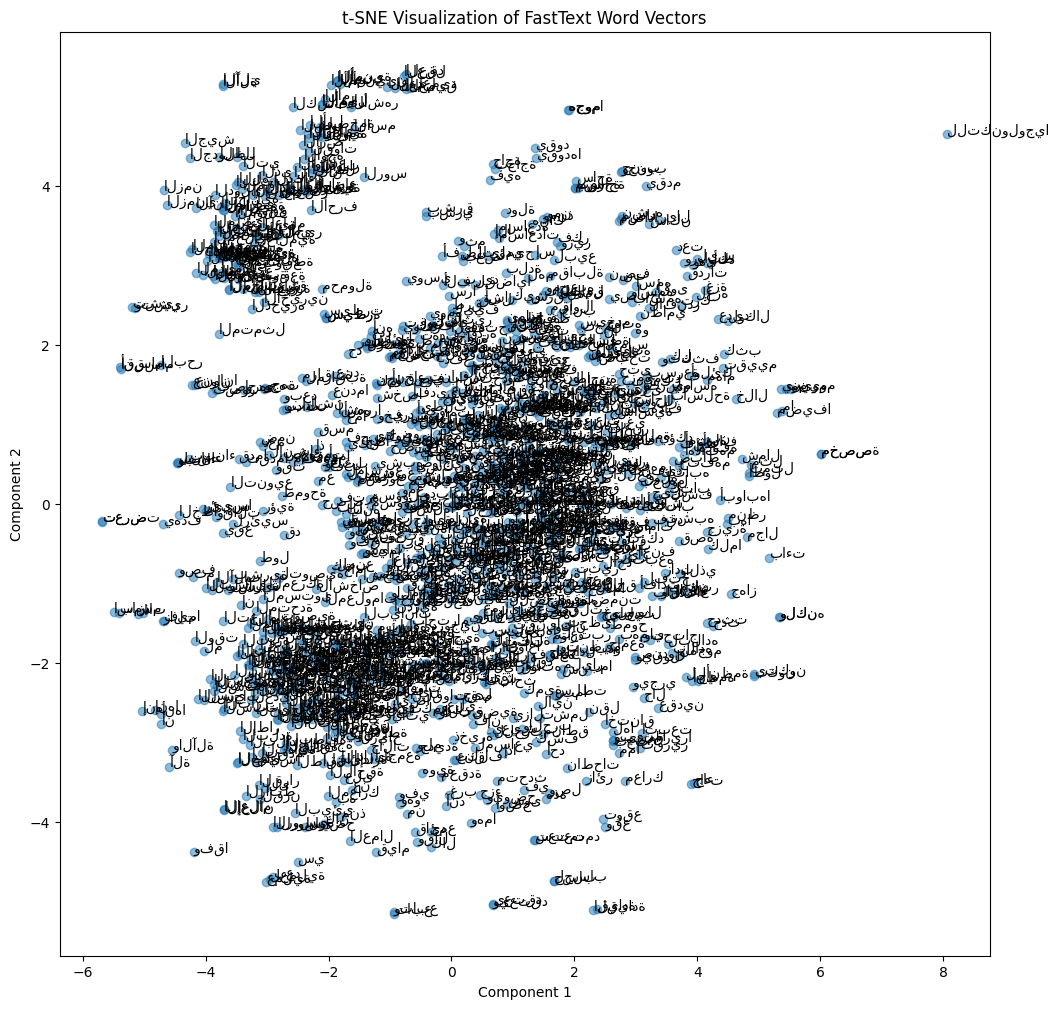

In [28]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models import FastText

# Assuming 'fasttext_model' is your trained FastText model
# Extract word vectors from the FastText model
words = list(fasttext_model.wv.index_to_key)  # Get list of words in the vocabulary
word_vectors = np.array([fasttext_model.wv[word] for word in words])

# Initialize and apply t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(word_vectors)

# Plotting the t-SNE results
plt.figure(figsize=(12, 12))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)

# Optionally, add annotations for each point
for i, word in enumerate(words):
    plt.annotate(word, (tsne_results[i, 0], tsne_results[i, 1]))

plt.title('t-SNE Visualization of FastText Word Vectors')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


# Préparation des données pour t-SNE
words = list(glove_model.key_to_index.keys())
word_vectors = np.array([glove_model[word] for word in words if word in glove_model])

# Application de t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(word_vectors)

# Affichage des résultats
plt.figure(figsize=(12, 12))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
for i, word in enumerate(words):
    plt.annotate(word, (tsne_results[i, 0], tsne_results[i, 1]))
plt.title('t-SNE Visualization of GloVe Word Vectors')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()